<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/Hybrid%20LR-CNN%20for%204%20class%20classifications%20based%20on%20WSNBFSF%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Hybrid LR-CNN for 4 class classifications based on WSNBFSF dataset**

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout, Flatten

In [2]:
# Load dataset
dataset = pd.read_csv("dataset.csv")
dataset = dataset.dropna() # Remove missing values
X = dataset.drop(['Class'], axis=1)
y = dataset['Class']

**Data Preprocessing**

In [3]:
# Encode labels
encoder = LabelEncoder()
y = encoder.fit_transform(dataset['Class'])

In [4]:
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(dataset.drop(['Class'], axis=1))

In [5]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Hybrid combination of LR-CNN for 4 class classifications**

In [6]:
# Train logistic regression model
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_acc)
print(classification_report(y_test, lr_pred))

Logistic Regression Accuracy: 0.9374899875044055
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     52692
           1       0.40      0.00      0.00      2378
           2       0.39      0.03      0.06      1496
           3       0.94      1.00      0.97      5856

    accuracy                           0.94     62422
   macro avg       0.67      0.51      0.50     62422
weighted avg       0.90      0.94      0.91     62422



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
from keras.layers import Conv1D, MaxPooling1D, Flatten

# Train CNN model
num_classes = len(np.unique(y))
input_dim = X_train.shape[1]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
cnn_model = Sequential()
cnn_model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(input_dim, 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dense(num_classes, activation='softmax'))
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
y_train_onehot = pd.get_dummies(y_train).values
cnn_model.fit(X_train, y_train_onehot, epochs=15, batch_size=32, verbose=0)
cnn_pred = cnn_model.predict(X_test)
cnn_pred = np.argmax(cnn_pred, axis=1)
cnn_acc = accuracy_score(y_test, cnn_pred)
print("CNN Accuracy:", cnn_acc)
print(classification_report(y_test, cnn_pred))

1951/1951 [==============================] - 2s 951us/step
CNN Accuracy: 0.9626734164236967
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     52692
           1       0.90      0.41      0.56      2378
           2       0.82      0.58      0.68      1496
           3       0.96      1.00      0.98      5856

    accuracy                           0.96     62422
   macro avg       0.91      0.75      0.80     62422
weighted avg       0.96      0.96      0.96     62422



In [8]:
from sklearn.metrics import classification_report, accuracy_score

# Combine predictions
lr_probs = lr_model.predict_proba(np.reshape(X_test, (X_test.shape[0], -1)))
cnn_probs = cnn_model.predict(X_test)
combined_probs = (lr_probs + cnn_probs) / 2
combined_pred = np.argmax(combined_probs, axis=1)
combined_acc = accuracy_score(y_test, combined_pred)
print("Combined Accuracy:", combined_acc)
print(classification_report(y_test, combined_pred))

1951/1951 [==============================] - 3s 2ms/step
Combined Accuracy: 0.944314504501618
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     52692
           1       0.97      0.02      0.03      2378
           2       0.93      0.26      0.41      1496
           3       0.94      1.00      0.97      5856

    accuracy                           0.94     62422
   macro avg       0.95      0.57      0.60     62422
weighted avg       0.95      0.94      0.92     62422



In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def conf_mat(d1,d2):
  cm = confusion_matrix(d1, d2)
  plt.figure(figsize=(6,5.5))
  ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='YlGnBu')
  sns.set(font_scale=1)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])
  ax.yaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])
  plt.tight_layout()
  # plt.savefig("F1.eps", format = 'eps')
  plt.show()

Confusion Matrix of Hybrid LR-CNN Model


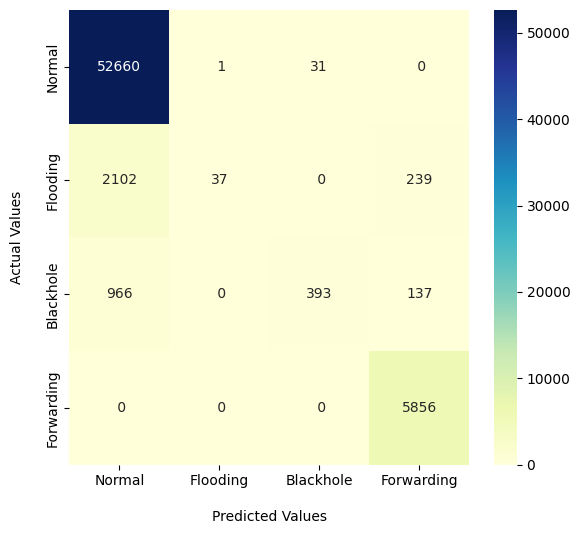

In [10]:
print("Confusion Matrix of Hybrid LR-CNN Model") 
conf_mat(y_test, combined_pred)

In [11]:
report = classification_report(y_test, combined_pred, output_dict=True)
detection_rates = {}
for cls in range(4):
    detection_rates[encoder.inverse_transform([cls])[0]] = report[str(cls)]['recall']
print("Detection rates:", detection_rates)

Detection rates: {0: 0.9993926971836332, 1: 0.015559293523969722, 2: 0.2627005347593583, 3: 1.0}
